In [1]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import cufflinks as cf
from plotly import figure_factory as FF
import scipy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats
import itertools
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Code Exercise

Overview of the conversion funnel:

         Homepage/Landing Page
         
            ↓ (Product Search)
            
         Search Page
         
            ↓ (Clicks on Product)
            
         Payment Page 
         
            ↓ (User Decides to Buy)
            
         Payment Confirmtion Page

Recommendation for overview of conversion funnel is to not just have one type. Have several funnel paths that visitors can take in order to become a lead/customer. The above overview may be the ideal path, but maybe not all visitors to the site share the same path to conversion. Therefore considering multiple funnels will allow consideration of other pages that may be hit leading to potential optimization opportunities. In order to create other funnels, good to work backwards from goal (Payment Confirmation Page) and see how a visitor may have gotten there through alternative routes (direct/after going through Customer Care, etc). Another thing to include in conversion funnel are microconversions, steps taken before visitor becames customer. For example, visiting the FAQ page to get questions answered before making a product purchase.

Recommendations for the product team would be derived from looking at the quality of traffic on the website which can be done using Google Analytics on the site. When using this tool, Key Performance Indicators can be tracked. The Bounce Rate, which is the percentage of single page visits, would be a good metric to examine. This is the percentage of visitors who visit the Home Page, but do not browse further. This negatively affects sales because visitors do not ever hit the Payment Confirmation Page to purchase a product and covert to a customer. Conversely, looking at Conversion rate metric would be advantageous to see what is the cause of visitors becoming customers. Third thing to look into regarding Key Performance Indicators would come from looking at the users table. It would be a good idea to examine the breakdown of different cohorts when it comes to gender, device used, how visitor came to the website. Determining cohorts could help in understanding shared characteristics within different segments so that NURX products continue to be compelling with these different groups.

Analysis of Bounce Rate, Conversion Rate and determining cohorts are near the end of the notebook along with further insights for the product team that might help redirect sales strategy.

Possible issues with the data are:
        
        Not enough information to measure website doing a good job at converting visitor to lead/becoming customer.
        Some other metrics that would be informative in making NURX B2B better would be:
            
            a. new visitors vs. returning visitors
            b. time on site/avg session duration
            c. pageviews per session (avg # of pgs visitor visits/visit)
            d. clicks (total # clicks link gets)
            e. click through rate (% visitors on page who click a link)
            f. blog traffic (good to compare with overall site traffic)

## 1. Load data

In [2]:
users = pd.read_csv("users.csv")

In [3]:
page_views = pd.read_csv("page_views.csv")

## 2. Exploratory Data Analysis

In [4]:
users.head()

,user_id,date,sex,device,origin
0,144912,2/28/15,Female,Desktop,organic_search
1,60659,1/13/15,Male,Desktop,organic_search
2,140860,4/9/15,Male,Desktop,social
3,206992,2/18/15,Female,Desktop,social
4,320259,1/15/15,Male,Desktop,social


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202653 entries, 0 to 202652
Data columns (total 5 columns):
user_id    202653 non-null int64
date       202653 non-null object
sex        202653 non-null object
device     202653 non-null object
origin     202653 non-null object
dtypes: int64(1), object(4)
memory usage: 7.7+ MB


Let's see if there was a high density of visitors on particular days. At the same time, will see the span of data across time.

In [6]:
users_dategroups = users.groupby(['date'])

In [7]:
users_dategroups.count().head()

,user_id,sex,device,origin
date,,,,
1/1/15,1557,1557,1557,1557
1/10/15,1651,1651,1651,1651
1/11/15,1655,1655,1655,1655
1/12/15,1625,1625,1625,1625
1/13/15,1564,1564,1564,1564


In [8]:
users_dategroups.count().tail()

,user_id,sex,device,origin
date,,,,
4/5/15,1596,1596,1596,1596
4/6/15,1678,1678,1678,1678
4/7/15,1807,1807,1807,1807
4/8/15,1776,1776,1776,1776
4/9/15,1662,1662,1662,1662


Here, the end date is 4/9/15. However, based on ordered dates from joined users and page_views tables at the end of this notebook, combined dataset actually spans from 1/1/15 to 4/30/15. The company is 4 months old at the time this dataset starts. And this is a data collection of 4 months. There are around 1600 hits per day which grows to around 1800 by the end of April.

## 3. Product Insights to Redirect Sales Strategy

In [9]:
from datetime import datetime
users['date'] =  pd.to_datetime(users['date'],
                              format='%m/%d/%y')

In [10]:
series = users['sex'].value_counts()
series.head()

Male      101643
Female    101010
Name: sex, dtype: int64

**Males**   : 101643/202653 = 0.50156178294
**Females** : 101010/202653 = 0.49843821705

There is almost 1 to 1 representation, which means there is no bias in who is interested in NURX. Not bad considering most of the product line started with birth control and media campaign on YouTube and Medium was mostly targeted at women.

In [11]:
#Scrolling over each bar gives count for each gender type, which verifies previous series.head() output.

series.iplot(kind='bar', yTitle='Count', title='Distribution of Gender Types')

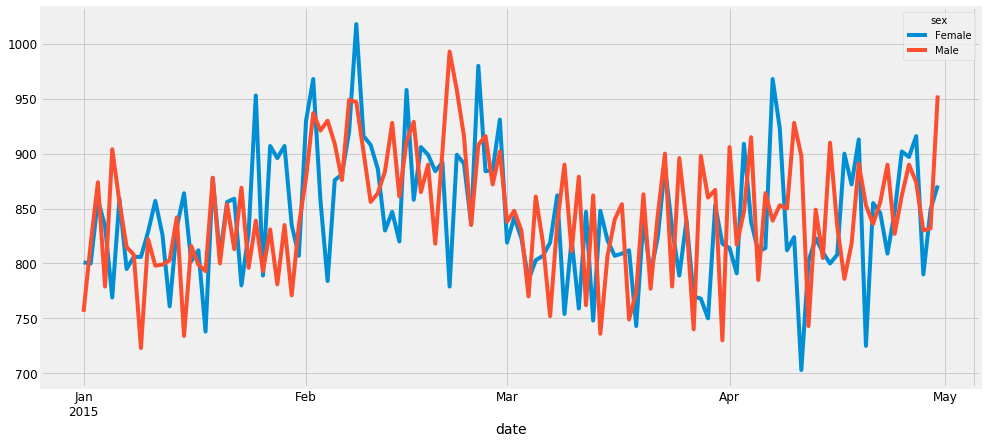

In [12]:
# #Gender Freq Counts Across 4 months
fig, ax = plt.subplots(figsize=(15,7))

users.groupby(['date','sex']).count()['device'].unstack().plot(ax=ax) #Daily visits(#'s grabbed from device column turned into freq counts)

There are peaks between Feb and March and dips after March.

In [13]:
series = users['device'].value_counts()
series.head()

Desktop    134787
Mobile      67866
Name: device, dtype: int64

**Desktop** : 134787/202653 = 0.66511228553
**Mobile**   : 67866/202653 = 0.33488771446

As usual, there are more desktop users. Mobile only makes up one-third of the users.
The loss in mobile traffic could be improved by offering Android users mobile app. This is currently in the works.

In [14]:
#Scrolling over each bar gives count for each device type, which verifies previous series.head() output.

series.iplot(kind='bar', yTitle='Count', title='Distribution of Device Types')

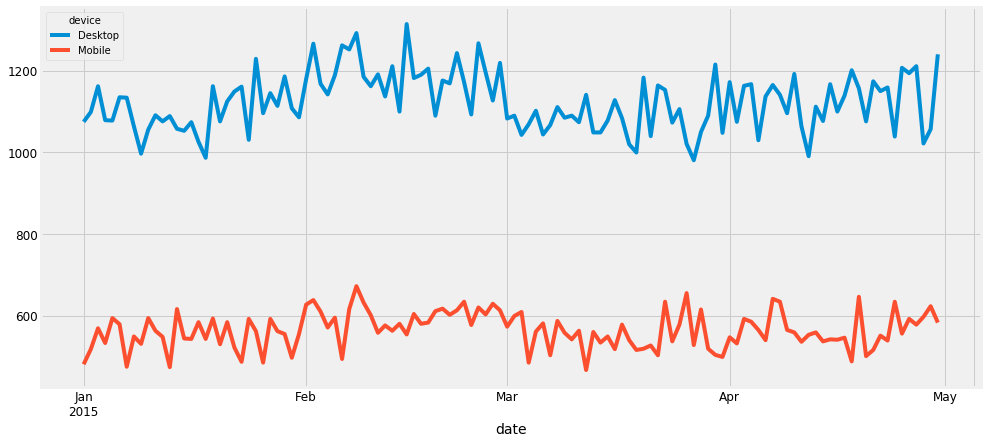

In [15]:
# #Device Freq Counts Across 4 months
fig, ax = plt.subplots(figsize=(15,7))

users.groupby(['date','device']).count()['sex'].unstack().plot(ax=ax)#Daily visits(#'s grabbed from sex column turned into freq counts)

There is a consistent gap between Desktop visitor and Mobile visitor across time.

In [16]:
series = users['origin'].value_counts()
series.head()

organic_search    57900
paid_search       40051
social            34276
unknown           29002
email             12805
Name: origin, dtype: int64

Organic Search, reaching users as they search is the winner with Paid Search being right behind and coming in third is Social. Organic Search is cheaper than Paid Search. And even though those on social media are not intentionally looking for NURX products, campaigns on Facebook and Twitter are also hitting target audiences.

In [17]:
#Scrolling over each bar gives count for each origin type, which verifies previous series.head() output.

series.iplot(kind='bar', yTitle='Count', title='Distribution of Origin Types')

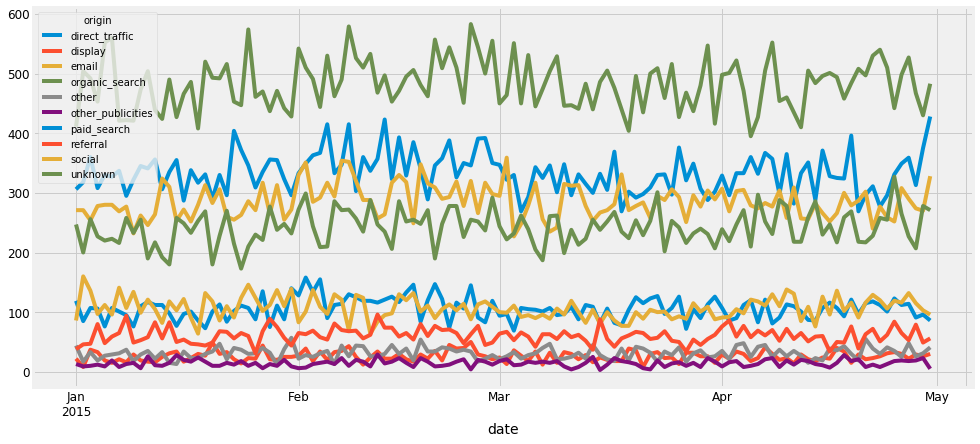

In [18]:
# #Origin Freq Counts Across 4 months
fig, ax = plt.subplots(figsize=(15,7))

users.groupby(['date','origin']).count()['device'].unstack().plot(ax=ax)#Daily visits(#'s grabbed from device column turned into freq counts)

Organic Search is well above Paid Search across time. Paid Search and Social though closer together as sources for visitor traffic, Paid Search still higher than Social. Product team wants to make sure website/mobile application have as many relevant users as possible to provide telemedicine solution to those who would be better off with it.

Now onto second table that goes into which pages visitor went on. This is where more detailed analytics could be tracked such as the intermediate pages that led visitor to Payment Confirmation page. From here, there can be feedback to the Product team about which pages are causing microconversions to help optimize the website/app for more sales.

In [19]:
page_views.head()

,user_id,homepage,pymt,pymt_confirmation,search_page
0,144912,1,0,0,0
1,60659,1,0,0,0
2,140860,1,0,0,1
3,206992,1,0,0,1
4,320259,1,0,0,0


In [20]:
page_views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202653 entries, 0 to 202652
Data columns (total 5 columns):
user_id              202653 non-null int64
homepage             202653 non-null int64
pymt                 202653 non-null int64
pymt_confirmation    202653 non-null int64
search_page          202653 non-null int64
dtypes: int64(5)
memory usage: 7.7 MB


Need to see if there are repeat visitors by seeing if all user_id's are unique.

In [21]:
len(users.user_id.unique())

138191

In [22]:
len(page_views.user_id.unique())

138191

It turns out that there are repeated visitors given that 202653-138191 = **64462** are repeated visits by at least one user. This is a good thing because it is indicative of repurchaes/retention.

If there are repeated users, can track what their conversion funnel, journey through site is in order to give feedback to Product team what pages/links/buttons are working on site.

Now, reordering page_views table to line up with conversion funnel steps.

In [23]:
page_views = page_views[['user_id', 'homepage', 'search_page', 'pymt', 'pymt_confirmation']]

In [24]:
page_views.head()

,user_id,homepage,search_page,pymt,pymt_confirmation
0,144912,1,0,0,0
1,60659,1,0,0,0
2,140860,1,1,0,0
3,206992,1,1,0,0
4,320259,1,0,0,0


Now, joining users table with page_views table to see the journey each user takes. Two things that will be looked at are Conversion Rate and Bounce Rate. To do this, I will isolate which rows have 1 under homepage but 0's for the rest of the columns. And the reverse will be seen for conversion (1 under pymt_confirmation regardless if there are 1's under search_page column and/or pymt column or not. 1's under search_page and pymt could be classified as microconversions though.

In [25]:
users.loc[users['user_id'] == 144912]

,user_id,date,sex,device,origin
0,144912,2015-02-28,Female,Desktop,organic_search
112612,144912,2015-04-08,Female,Desktop,organic_search


In [26]:
page_views.loc[page_views['user_id'] == 144912]

,user_id,homepage,search_page,pymt,pymt_confirmation
0,144912,1,0,0,0
112612,144912,1,0,0,0


Expected result of joining two tables is 202653 rows of data. Basically, the page_views table should be attached to the right side of the users table.

In [27]:
combo = pd.concat([users, page_views], axis=1, sort=False, join='inner')

In [28]:
combo.head()

,user_id,date,sex,device,origin,user_id,homepage,search_page,pymt,pymt_confirmation
0,144912,2015-02-28,Female,Desktop,organic_search,144912,1,0,0,0
1,60659,2015-01-13,Male,Desktop,organic_search,60659,1,0,0,0
2,140860,2015-04-09,Male,Desktop,social,140860,1,1,0,0
3,206992,2015-02-18,Female,Desktop,social,206992,1,1,0,0
4,320259,2015-01-15,Male,Desktop,social,320259,1,0,0,0


In [29]:
combo.shape

(202653, 10)

Looking into detail the timespan of data.

In [30]:
from datetime import datetime
combo['date'] =  pd.to_datetime(combo['date'],
                              format='%m/%d/%y')

In [31]:
combo_dategroups = combo.groupby(['date'])

In [32]:
combo_dategroups.count().head()

,user_id,sex,device,origin,user_id,homepage,search_page,pymt,pymt_confirmation
date,,,,,,,,,
2015-01-01,1557,1557,1557,1557,1557,1557,1557,1557,1557
2015-01-02,1618,1618,1618,1618,1618,1618,1618,1618,1618
2015-01-03,1732,1732,1732,1732,1732,1732,1732,1732,1732
2015-01-04,1613,1613,1613,1613,1613,1613,1613,1613,1613
2015-01-05,1673,1673,1673,1673,1673,1673,1673,1673,1673


In [33]:
combo_dategroups.count().tail()

,user_id,sex,device,origin,user_id,homepage,search_page,pymt,pymt_confirmation
date,,,,,,,,,
2015-04-26,1787,1787,1787,1787,1787,1787,1787,1787,1787
2015-04-27,1790,1790,1790,1790,1790,1790,1790,1790,1790
2015-04-28,1620,1620,1620,1620,1620,1620,1620,1620,1620
2015-04-29,1681,1681,1681,1681,1681,1681,1681,1681,1681
2015-04-30,1824,1824,1824,1824,1824,1824,1824,1824,1824


After putting the dates in chronological order, can see that data spans across 4 full months.

In [34]:
bounce = combo.loc[(combo['homepage'] == 1) & (combo['search_page'] == 0) & (combo['pymt'] == 0) & (combo['pymt_confirmation'] == 0)]

In [35]:
bounce.head()

,user_id,date,sex,device,origin,user_id,homepage,search_page,pymt,pymt_confirmation
0,144912,2015-02-28,Female,Desktop,organic_search,144912,1,0,0,0
1,60659,2015-01-13,Male,Desktop,organic_search,60659,1,0,0,0
4,320259,2015-01-15,Male,Desktop,social,320259,1,0,0,0
5,17641,2015-03-03,Male,Desktop,social,17641,1,0,0,0
7,287083,2015-01-27,Male,Mobile,paid_search,287083,1,0,0,0


In [36]:
bounce.shape

(101548, 10)

**Bounce Rate** : (101548/202653)*100 = 50.1093001337%

In [37]:
microconv = combo.loc[(combo['search_page'] == 1) | (combo['pymt'] == 1) | ((combo['search_page'] == 1) & (combo['pymt'] == 1))]

In [38]:
microconv.head()

,user_id,date,sex,device,origin,user_id,homepage,search_page,pymt,pymt_confirmation
2,140860,2015-04-09,Male,Desktop,social,140860,1,1,0,0
3,206992,2015-02-18,Female,Desktop,social,206992,1,1,0,0
6,195401,2015-04-15,Female,Desktop,direct_traffic,195401,1,1,0,0
9,316323,2015-02-24,Female,Mobile,social,316323,1,1,0,0
12,210102,2015-03-14,Male,Desktop,organic_search,210102,1,1,0,0


In [39]:
microconv.shape

(101105, 10)

**Microconversion Rate** : (101105/202653)*100 = 49.8906998663%

In [40]:
conv = combo.loc[combo['pymt_confirmation'] == 1]

In [41]:
conv.head()

,user_id,date,sex,device,origin,user_id,homepage,search_page,pymt,pymt_confirmation
61,230531,2015-02-05,Male,Desktop,paid_search,230531,1,1,1,1
261,188498,2015-02-11,Female,Mobile,paid_search,188498,1,1,1,1
402,271622,2015-01-09,Female,Mobile,direct_traffic,271622,1,1,1,1
412,253652,2015-02-25,Male,Mobile,social,253652,1,1,1,1
785,14563,2015-01-31,Male,Desktop,organic_search,14563,1,1,1,1


In [42]:
conv.shape

(990, 10)

**Conversion Rate** : (990/202653)*100 = 0.48851978505%

The Bounce Rate and Microconversion Rate shared similar percentages - 50%. 

The Conversion Rate was really low during this time. The web/mobile application may have had more friction towards checkout. There were possibly too many questions prior to payment that may have made checkout flow not smooth. Possibly target audience may not have been right. In order to pique visitors' interests could include competitive shopping/returns policy, offer promotions, somehow promote product as a need rather than an option. Possibly, customer is confused with all the options and needs clear direction with next step to purchase product.

In order to rectify these possible issues, need to keep in mind that when going down the conversion funnel, the visitor goes from being Aware -> Interested -> Desiring -> Taking Action. With each stage, different things can be offered by Product team as a sales strategy to keep a visitor's attention such as educational podcast, data visualization or product/solution focused whitepaper.

By following these recommendations and making small changes to any of the site pages whether it be Homepage/Landing page/Search Page, etc, optimizing a certain page and using A/B testing to assess which versions are hits, an additional 1% increase in Conversion can still significantly increase amouunt of visitors engaging with site. And this is key to eventually converting visitors to customers.